In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')
import gempy as gp
import gempy_viewer as gpv

# Importing auxiliary libraries
import numpy as np
import time
from  gempy_engine.API.interp_single import  _interp_scalar_field

np.random.seed(5555)

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.
Setting Backend To: AvailableBackends.numpy


In [2]:
#data_path = os.path.abspath('../../')
geo_data: gp.data.GeoModel = gp.create_geomodel(
    project_name='kriging',
    extent=[0, 1000, 0, 1000, 0, 1000],
    resolution=[20,20,20],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations="orientations.csv",
        path_to_surface_points="points.csv",
    )
)

In [ ]:
import cProfile
import pstats
with cProfile.Profile() as profile:
    gp.compute_model(geo_data)
results = pstats.Stats(profile)
results.sort_stats(pstats.SortKey.TIME)
results.print_stats()

In [3]:
import numpy as np, sys
np.set_printoptions(linewidth=10**9)       # 很寬就不會自動斷行
# 可選：避免大型陣列被省略成 "..."
np.set_printoptions(threshold=sys.maxsize)
t1 = time.perf_counter_ns()
gp.compute_model(geo_data)
t2 = time.perf_counter_ns()
total_time = t2 - t1
print(f'matrix_time: {_interp_scalar_field.matrix_time}')
print(f'weight_time: {_interp_scalar_field.weight_time}')
print(f'eval_time: {_interp_scalar_field.total_eval_time}')
print(f'total_time: {total_time}')

Setting Backend To: AvailableBackends.numpy
matrix_time: 1336800
weight_time: 1485600
eval_time: 564074500.0
total_time: 617506200


In [4]:
matrix_ratio = (_interp_scalar_field.matrix_time/total_time)*100
weight_ratio = (_interp_scalar_field.weight_time/total_time)*100
eval_ratio = (_interp_scalar_field.total_eval_time/total_time)*100
print(f'matrix: {matrix_ratio}%')
print(f'weight: {weight_ratio}%')
print(f'eval: {eval_ratio}%')

matrix: 0.21648365635843012%
weight: 0.24058058040550848%
eval: 91.34717999592554%


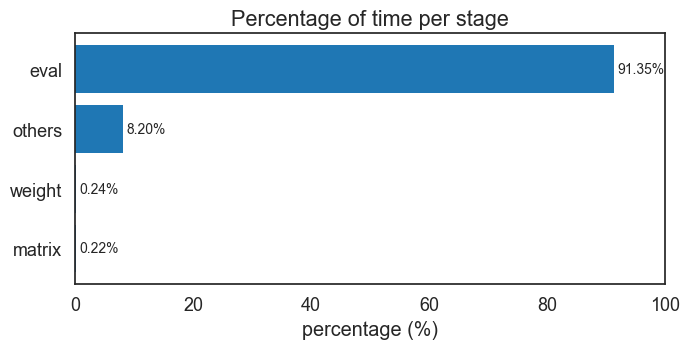

In [6]:
import matplotlib.pyplot as plt

# 以百分比為單位；把這裡換成你計算出的占比
labels = ["matrix", "weight", "others", "eval"]
percents = [matrix_ratio, weight_ratio, 100-matrix_ratio-weight_ratio-eval_ratio, eval_ratio]

fig, ax = plt.subplots(figsize=(7, 3.6))
bars = ax.barh(labels, percents)
ax.set_xlabel("percentage (%)")
ax.set_xlim(0, 100)
ax.set_title("Percentage of time per stage")

for bar, v in zip(bars, percents):
    ax.text(v + 0.5, bar.get_y() + bar.get_height()/2, f"{v:.2f}%", va="center")

plt.tight_layout()
plt.show()


In [ ]:
geo_data.solutions.raw_arrays.scalar_field_matrix.reshape((20,20,20))

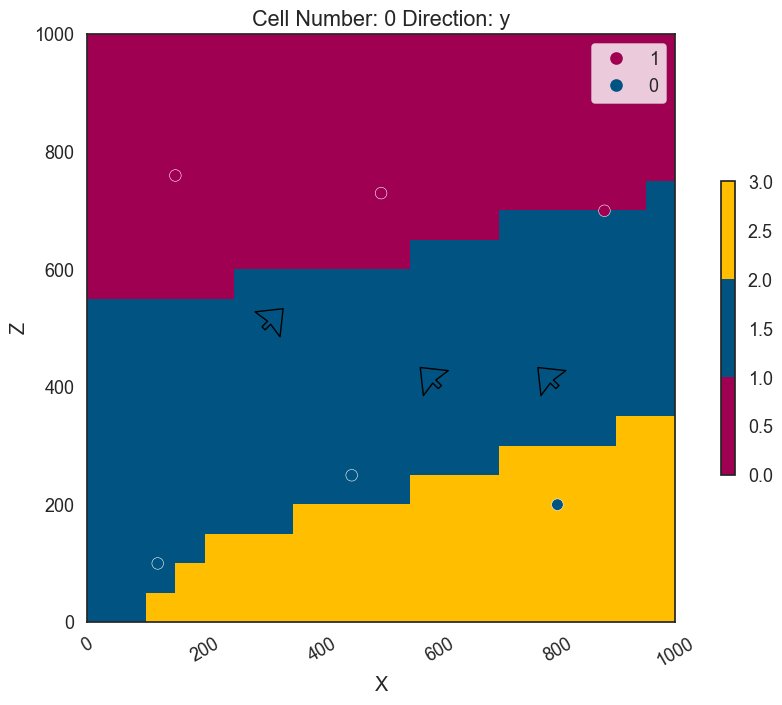

In [4]:
plot = gpv.plot_2d(geo_data, show_lith=True, show_boundaries=False, direction= 'y', cell_number=0)

In [ ]:
gpv.plot_3d(geo_data, show_surfaces=False, image=False, show_data=False)

In [ ]:
import numpy as np, sys
np.set_printoptions(linewidth=10**9)       # 很寬就不會自動斷行
# 可選：避免大型陣列被省略成 "..."
np.set_printoptions(threshold=sys.maxsize)
geo_data.solutions.debug_input_data

In [3]:
geo_data.surface_points_copy

X,Y,Z,id,nugget
120.00,600.00,100.00,0,0.00
800.00,200.00,200.00,0,0.00
450.00,180.00,250.00,0,0.00
150.00,460.00,760.00,100000001,0.00
880.00,120.00,700.00,100000001,0.00
500.00,700.00,730.00,100000001,0.00


In [4]:
geo_data.orientations_copy

X,Y,Z,G_x,G_y,G_z,id,nugget
300.00,800.00,500.00,1.00,0.00,1.00,0,0.01
600.00,0.00,400.00,-1.00,0.00,1.00,0,0.01
800.00,500.00,400.00,-1.00,0.00,1.00,0,0.01


In [7]:
import numpy as np, sys
np.set_printoptions(linewidth=10**9)       # 很寬就不會自動斷行
# 可選：避免大型陣列被省略成 "..."
np.set_printoptions(threshold=sys.maxsize)
geo_data.solutions.debug_input_data

{'cov_grad': array([[ 4.85423723,  1.8745022 ,  1.64943948,  0.        ,  0.75458309,  0.76841087,  0.        ,  0.09432289,  0.25613696,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.8745022 ,  4.85423723,  2.86347651,  0.75458309,  0.        , -0.5723917 ,  0.09432289,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.64943948,  2.86347651,  4.85423723,  0.76841087, -0.5723917 ,  0.        ,  0.25613696,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.75458309,  0.76841087,  4.85423723,  0.1452493 ,  2.46907775,  0.        , -0.2515277 , -0.15368217,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.75458309,  0.        , -0.5723917 ,  0.1452493 ,  4.85423723,  1.66145394, -0.2515277 ,  0.        ,  0.

In [ ]:
a = geo_data.solutions.raw_arrays.lith_block
a

In [7]:
geo_data.solutions.raw_arrays.scalar_field_matrix

array([[-3.33987277e-01, -2.64357478e-01, -1.74147803e-01, -6.36441505e-02,  6.30528892e-02,  2.00146720e-01,  3.42428863e-01,  4.86075741e-01,  6.28402810e-01,  7.67493922e-01, -3.61798801e-01, -3.03851988e-01, -2.25203687e-01, -1.24333124e-01, -4.20632427e-03,  1.29438499e-01,  2.70620639e-01,  4.14465875e-01,  5.57468204e-01,  6.97344326e-01, -3.74709236e-01, -3.28750055e-01, -2.63903032e-01, -1.76314753e-01, -6.67312092e-02,  6.01348931e-02,  1.97899802e-01,  3.40451856e-01,  4.83117323e-01,  6.23081929e-01, -3.74259654e-01, -3.39903603e-01, -2.90488816e-01, -2.19200517e-01, -1.23503333e-01, -6.23021143e-03,  1.26138696e-01,  2.66059433e-01,  4.07353054e-01,  5.46635408e-01, -3.66820665e-01, -3.43468762e-01, -3.10421814e-01, -2.56990355e-01, -1.76623937e-01, -6.99601436e-02,  5.63008982e-02,  1.92955053e-01,  3.32243721e-01,  4.70305555e-01, -3.62057993e-01, -3.48742549e-01, -3.31311701e-01, -2.94697326e-01, -2.28405293e-01, -1.30984340e-01, -9.96866203e-03,  1.23453029e-01,  2.605

In [ ]:
geo_data.solutions.raw_arrays.lith_block.T[1]

In [ ]:
np.shape(a)

In [ ]:
plot = gpv.plot_2d(geo_data, show_lith=True, show_boundaries=False, direction= 'y', cell_number=0)

In [ ]:
gpv.plot_3d(geo_data, show_surfaces=False, image=False, show_data=False)

In [ ]:
geo_data.regular_grid_coordinates[5]

In [8]:
geo_data.interpolation_options.kernel_options.kernel_solver

<Solvers.DEFAULT: 1>

In [7]:
geo_data.surface_points_copy_transformed

X,Y,Z,id,nugget
-0.22,0.04,0.21,100000001,0.00
0.24,-0.17,0.17,100000001,0.00
0.00,0.19,0.19,100000001,0.00
-0.24,0.12,-0.21,0,0.00
0.19,-0.12,-0.14,0,0.00
-0.03,-0.14,-0.11,0,0.00


In [9]:
geo_data.regular_grid_coordinates

array([[   0.,    0.,    0.],
       [   0.,    0.,   50.],
       [   0.,    0.,  100.],
       [   0.,    0.,  150.],
       [   0.,    0.,  200.],
       [   0.,    0.,  250.],
       [   0.,    0.,  300.],
       [   0.,    0.,  350.],
       [   0.,    0.,  400.],
       [   0.,    0.,  450.],
       [   0.,    0.,  500.],
       [   0.,    0.,  550.],
       [   0.,    0.,  600.],
       [   0.,    0.,  650.],
       [   0.,    0.,  700.],
       [   0.,    0.,  750.],
       [   0.,    0.,  800.],
       [   0.,    0.,  850.],
       [   0.,    0.,  900.],
       [   0.,    0.,  950.],
       [   0.,    0., 1000.],
       [   0.,   50.,    0.],
       [   0.,   50.,   50.],
       [   0.,   50.,  100.],
       [   0.,   50.,  150.],
       [   0.,   50.,  200.],
       [   0.,   50.,  250.],
       [   0.,   50.,  300.],
       [   0.,   50.,  350.],
       [   0.,   50.,  400.],
       [   0.,   50.,  450.],
       [   0.,   50.,  500.],
       [   0.,   50.,  550.],
       [  

In [ ]:
geo_data.grid

In [6]:
geo_data.regular_grid_coordinates_transformed

[[   1.    0.    0. -500.]
 [   0.    1.    0. -400.]
 [   0.    0.    1. -430.]
 [   0.    0.    0.    1.]]
0.0013879000034648925


array([[-0.3125 , -0.25   , -0.26875],
       [-0.3125 , -0.25   , -0.2375 ],
       [-0.3125 , -0.25   , -0.20625],
       [-0.3125 , -0.25   , -0.175  ],
       [-0.3125 , -0.25   , -0.14375],
       [-0.3125 , -0.25   , -0.1125 ],
       [-0.3125 , -0.25   , -0.08125],
       [-0.3125 , -0.25   , -0.05   ],
       [-0.3125 , -0.25   , -0.01875],
       [-0.3125 , -0.25   ,  0.0125 ],
       [-0.3125 , -0.25   ,  0.04375],
       [-0.3125 , -0.25   ,  0.075  ],
       [-0.3125 , -0.25   ,  0.10625],
       [-0.3125 , -0.25   ,  0.1375 ],
       [-0.3125 , -0.25   ,  0.16875],
       [-0.3125 , -0.25   ,  0.2    ],
       [-0.3125 , -0.25   ,  0.23125],
       [-0.3125 , -0.25   ,  0.2625 ],
       [-0.3125 , -0.25   ,  0.29375],
       [-0.3125 , -0.25   ,  0.325  ],
       [-0.3125 , -0.25   ,  0.35625],
       [-0.3125 , -0.21875, -0.26875],
       [-0.3125 , -0.21875, -0.2375 ],
       [-0.3125 , -0.21875, -0.20625],
       [-0.3125 , -0.21875, -0.175  ],
       [-0.3125 , -0.2187

In [ ]:
gp.compute_model_at(geo_data, [0,0,0])

In [ ]:
geo_data.surface_points_copy_transformed

In [ ]:
gp.map_stack_to_surfaces(
    gempy_model=geo_data,
    mapping_object={
        "Strat_Series": ('rock2', 'rock1'),
        "Basement_Series": ('basement')
    }
)

In [ ]:
geo_data.grid

In [ ]:
geo_data.structural_frame.element_id_name_map

In [ ]:
geo_data.input_transform.apply

In [ ]:
geo_data.input_transform.get_transform_matrix